In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("F:/VS-Python/LinearRegression/nasdaq100.csv", sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [6]:
df = df.drop( columns= ['Date'])

In [7]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


In [12]:
df.isnull().sum()

Starting (USD)    0
Ending (USD)      0
dtype: int64

In [10]:
x = df[['Starting (USD)']]
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [11]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


Text(0, 0.5, 'Ending USD')

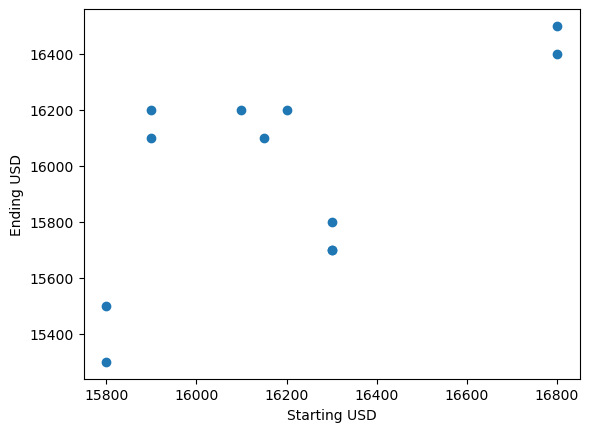

In [18]:
plt.scatter(x,y)
plt.xlabel('Starting USD')
plt.ylabel('Ending USD')

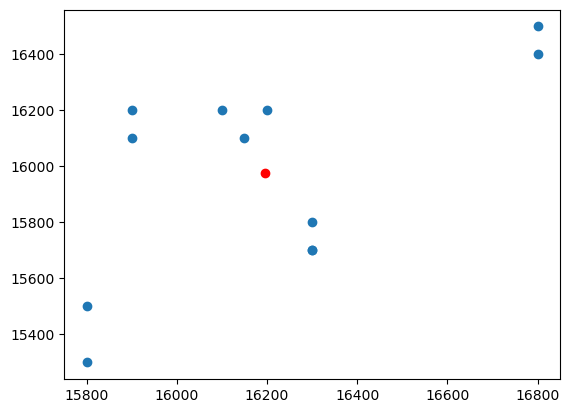

In [19]:
plt.scatter(x.mean(), y.mean() , color = 'red')

plt.scatter(x,y)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
reg.predict(x)

array([[16369.26885625],
       [15781.94421522],
       [15716.68592177],
       [15912.46080211],
       [16042.97738901],
       [16369.26885625],
       [15781.94421522],
       [15716.68592177],
       [15945.08994884],
       [16042.97738901],
       [15977.71909556],
       [16042.97738901]])

Text(0.5, 1.0, 'Learning Result')

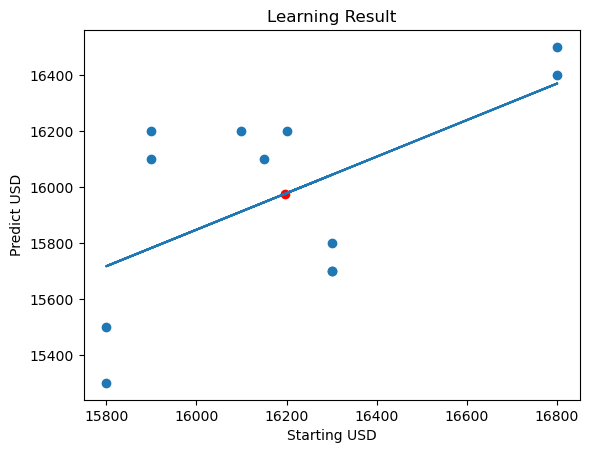

In [32]:
plt.plot(x, reg.predict(x))
plt.scatter(x,y)
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.xlabel("Starting USD")
plt.ylabel("Predict USD")
plt.title("Learning Result")

In [36]:
df["predict_y"] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),predict_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


# Lose and Cost

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mse = mean_squared_error(df['Ending (USD)'], df["predict_y"])
mse

80411.23397700385

In [38]:
mae = mean_absolute_error(df['Ending (USD)'], df["predict_y"])
mae

260.3840017604666

In [45]:
df['lose'] = df['Ending (USD)'] - df['predict_y']
df.lose

0     130.731144
1     318.055785
2    -416.685922
3     287.539198
4    -342.977389
5      30.731144
6     418.055785
7    -216.685922
8     154.910051
9    -242.977389
10    222.280904
11   -342.977389
Name: lose, dtype: float64

In [47]:
sum(abs(df['lose']))/ len(x)

260.3840017604666

Text(0.5, 1.0, 'Learning Result')

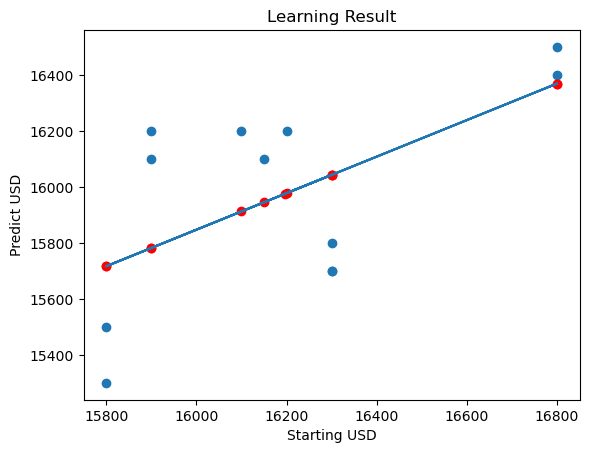

In [51]:
plt.plot(x, reg.predict(x))
plt.scatter(x,y)
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.scatter(x, reg.predict(x), color = 'red')

plt.xlabel("Starting USD")
plt.ylabel("Predict USD")
plt.title("Learning Result")